<!-- ![Alt Text](https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/header.png) -->

<div style="display: flex; justify-content: flex-start; align-items: center;">
   <a href="https://colab.research.google.com/github/msfasha/307304-Data-Mining/blob/main/20243/Part%203-Classification/3-classification_random_forest.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 20px;">
    <a href="https://www.youtube.com/watch?v=J4Wdy0Wc_xQ" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="Decision Trees Youtube Video" style="height: 40px;">
    </a>
</div>

## Random Forests

### Introduction

Random Forest is an ensemble learning method that builds multiple decision trees and combines their results to improve predictive performance and control overfitting. It operates by constructing many decision trees during training time and outputting the class that is the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees.

Each tree in the forest is trained on a slightly different subset of the data and features, ensuring diversity among the trees. The combination of these diverse models helps Random Forest achieve better generalization on unseen data compared to a single decision tree.



<div style="display: flex; justify-content: flex-start; align-items: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/random_forests.png" alt="Random Forests" width="300" height="auto"/>
</a>
</div>

### Benefits of Random Forests

- **Higher accuracy than a single decision tree** by aggregating predictions.
- **Reduces overfitting**: Combining many trees lowers variance.
- **Handles missing data** and maintains accuracy when parts of the data are missing.
- **Works well with high-dimensional data**: Can handle large feature spaces.
- **Feature importance evaluation**: Can identify which features are most influential for prediction.

### Key Settings for Random Forests

- **n_estimators**: The number of decision trees in the forest.
- **Criterion**: Metric used to evaluate the quality of a split ('gini' for Gini Impurity, 'entropy' for Information Gain).
- **Max Features**: The number of features considered when looking for the best split.
- **Max Depth**: The maximum depth of the trees. Limiting depth can help prevent overfitting.
- **Bootstrap**: Whether bootstrap samples are used when building trees.
- **Random State**: Controls randomness for reproducibility.

### Bootstrap Sampling in Random Forests

Bootstrap sampling is the default method used in Random Forests. In bootstrap sampling, each tree is trained on a randomly drawn subset of the training data **with replacement**. This means that:

- Some samples may appear more than once in the training set for a tree.
- Some samples may not appear at all.

Bootstrap sampling introduces diversity among the trees, making the model more robust and reducing overfitting.

#### Alternative to Bootstrap: Pasting

An alternative to bootstrap sampling is called **pasting**. In pasting, the trees are trained on random subsets of the training data **without replacement**. Each data point appears at most once in each subset.

- **Bootstrap (sampling with replacement)**: `bootstrap=True` (default in scikit-learn).
- **Pasting (sampling without replacement)**: `bootstrap=False`.

Choosing between bootstrap and pasting depends on the dataset and problem, but typically bootstrap improves the ensemble's robustness by increasing tree diversity.

### Random Forest Implementation using the Loan Default Dataset

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       236
           1       0.86      0.69      0.77        64

    accuracy                           0.91       300
   macro avg       0.89      0.83      0.85       300
weighted avg       0.91      0.91      0.91       300


Confusion Matrix:
 [[229   7]
 [ 20  44]]


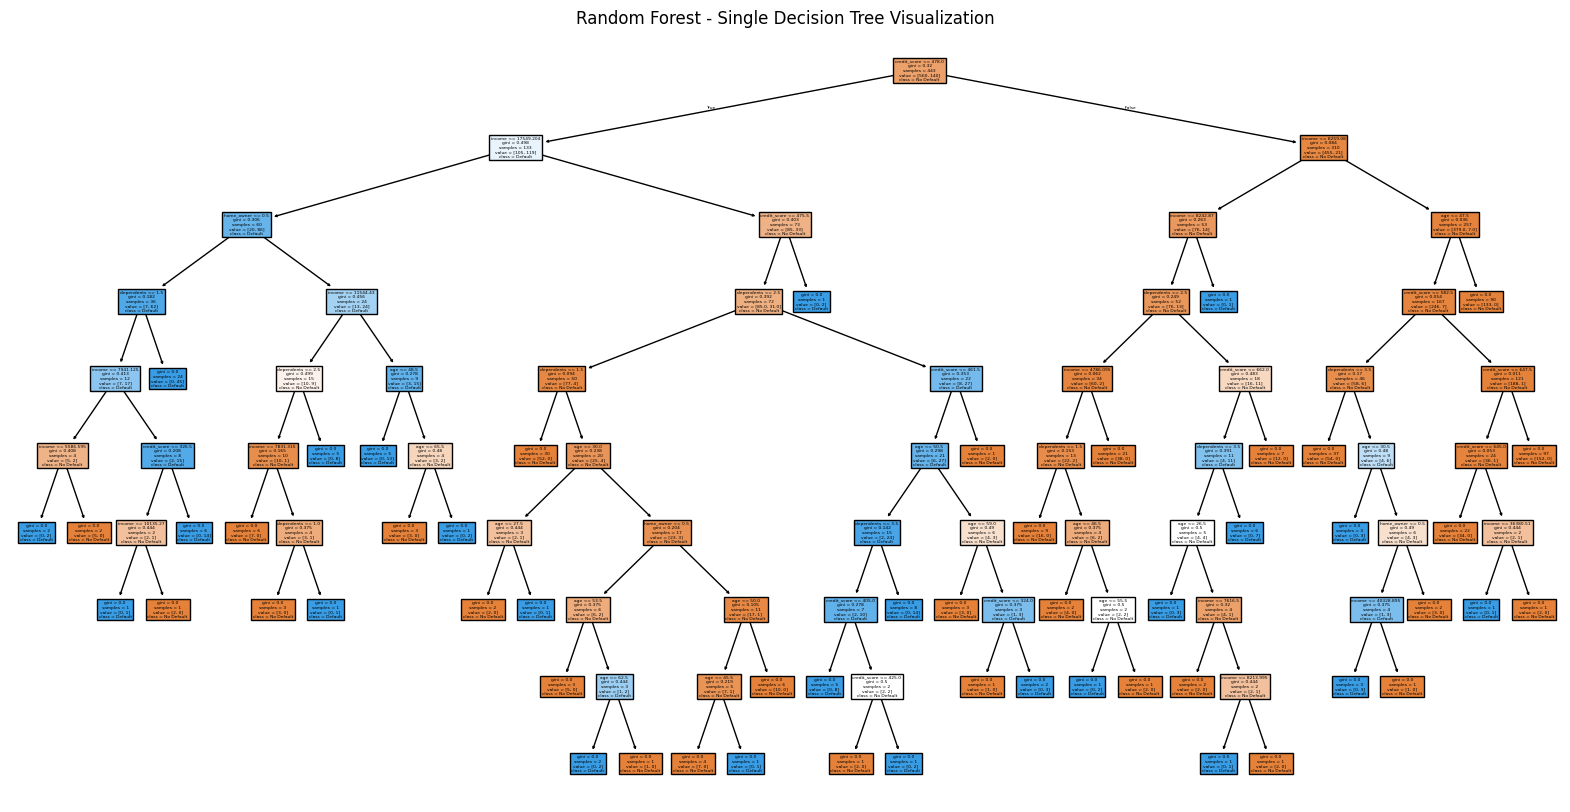

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = "https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/datasets/loan_default_prediction.csv"
data = pd.read_csv(url)

# Separate features and target variable
X = data.drop('loan_default', axis=1)  # Features
y = data['loan_default']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    random_state=42,
    bootstrap=True  # Set to False for pasting instead of bootstrapping
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot a single tree from the forest for visualization
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['No Default', 'Default'], filled=True)
plt.title("Random Forest - Single Decision Tree Visualization")
plt.savefig("random_forest_single_tree_plot.png", format="png", dpi=300, bbox_inches='tight')
plt.show()